In [ ]:
import statsmodels.api as sm
import statsmodels.regression.linear_model as lm
import pandas as pd
import numpy as np
from scipy import stats
import statistics as s
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
sns.set()
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import  GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
df = pd.read_csv("/content/2022_manhattan-2 - Manhattan.csv")

df.shape

(27432, 21)

In [ ]:
ir = pd.read_csv("/content/DGS10.csv")
ir.shape

(1718, 2)

In [ ]:
ir.tail()

,DATE,DGS10
1713,2023-07-28,3.96
1714,2023-07-31,3.97
1715,2023-08-01,4.05
1716,2023-08-02,4.08
1717,2023-08-03,4.20


In [ ]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL\nUNITS,COMMERCIAL\nUNITS,TOTAL \nUNITS,LAND \nSQUARE FEET,GROSS \nSQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS\nAT TIME OF SALE,SALE PRICE,SALE DATE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,374.0,46.0,NaN,A4,347 EAST 4TH STREET,NaN,...,1,0.0,1,"2,116","4,400",1900.0,1.0,A4,"399,000",9/29/2022
2,1.0,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,377.0,1.0,NaN,S2,110 AVENUE C,NaN,...,2,1.0,3,"1,502","2,790",1901.0,1.0,S2,"2,999,999",9/15/2022
3,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373.0,16.0,NaN,C1,326 EAST 4TH STREET,NaN,...,10,0.0,10,"2,204","8,625",1899.0,2.0,C1,"16,800,000",8/4/2022
4,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373.0,17.0,NaN,C1,328 EAST 4TH STREET,NaN,...,10,0.0,10,"2,204","8,625",1900.0,2.0,C1,"16,800,000",8/4/2022


In [ ]:
df = df.drop(0)

In [ ]:

df.drop('BOROUGH', axis=1, inplace=True)

In [ ]:
df.drop('GROSS \nSQUARE FEET', axis=1, inplace=True)
df.drop('BUILDING CLASS AT PRESENT', axis=1, inplace=True)
df.drop('BUILDING CLASS\nAT TIME OF SALE', axis=1, inplace=True)
df.drop('EASE-MENT', axis=1, inplace=True)
df.drop('COMMERCIAL\nUNITS', axis=1, inplace=True)
df.drop('APARTMENT NUMBER', axis=1, inplace=True)
df.drop('TOTAL \nUNITS', axis=1, inplace=True)
df.drop('TAX CLASS AT PRESENT', axis=1, inplace=True)
df.drop('RESIDENTIAL\nUNITS', axis=1, inplace=True)
df.drop('COMMERCIAL\nUNITS', axis=1, inplace=True)

KeyError: ignored

In [ ]:
df.drop('TAX CLASS AT TIME OF SALE', axis=1, inplace=True)

In [ ]:
df.dtypes

NEIGHBORHOOD                object
BUILDING CLASS CATEGORY     object
BLOCK                      float64
LOT                        float64
ADDRESS                     object
ZIP CODE                   float64
LAND \nSQUARE FEET          object
YEAR BUILT                 float64
SALE PRICE                  object
SALE DATE                   object
dtype: object

In [ ]:
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

NEIGHBORHOOD                   0
BUILDING CLASS CATEGORY        0
BLOCK                          0
LOT                            0
ADDRESS                        0
ZIP CODE                       0
LAND \nSQUARE FEET         20781
YEAR BUILT                  2989
SALE PRICE                     0
SALE DATE                      0
dtype: int64

In [ ]:
condition = nan_count != 0 # look for all columns with missing values

col_names = nan_count[condition].index # get the column names
print(col_names)

nan_cols = list(col_names) # convert column names to list
print(nan_cols)

Index(['LAND \nSQUARE FEET', 'YEAR BUILT'], dtype='object')
['LAND \nSQUARE FEET', 'YEAR BUILT']


In [ ]:
#df['LAND \nSQUARE FEET'] = pd.to_numeric(df['LAND \nSQUARE FEET'], errors='coerce')

#mean_landsqf = df['LAND \nSQUARE FEET'].mean()
#df['LAND \nSQUARE FEET'].fillna(value=mean_landsqf, inplace=True)


In [ ]:
#rolling_avg = df['YEAR BUILT'].rolling(window=20, min_periods=1).mean()
#df['YEAR BUILT'].fillna(value=rolling_avg, inplace=True)

In [ ]:
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

NEIGHBORHOOD                   0
BUILDING CLASS CATEGORY        0
BLOCK                          0
LOT                            0
ADDRESS                        0
ZIP CODE                       0
LAND \nSQUARE FEET         20781
YEAR BUILT                  2989
SALE PRICE                     0
SALE DATE                      0
dtype: int64

In [ ]:
columns_to_check = ['NEIGHBORHOOD','BUILDING CLASS CATEGORY', 'SALE DATE']
unique_values_dict = {}
for column in columns_to_check:
    unique_values_dict[column] = df[column].unique()

for column, unique_values in unique_values_dict.items():
    print(f"Unique values in {column}: {unique_values}")

Unique values in NEIGHBORHOOD: ['ALPHABET CITY' 'CHELSEA' 'CHINATOWN' 'CIVIC CENTER' 'CLINTON'
 'EAST VILLAGE' 'FASHION' 'FINANCIAL' 'FLATIRON' 'GRAMERCY'
 'GREENWICH VILLAGE-CENTRAL' 'GREENWICH VILLAGE-WEST' 'HARLEM-CENTRAL'
 'HARLEM-EAST' 'HARLEM-UPPER' 'HARLEM-WEST' 'INWOOD' 'JAVITS CENTER'
 'KIPS BAY' 'LITTLE ITALY' 'LOWER EAST SIDE' 'MANHATTAN VALLEY'
 'MIDTOWN CBD' 'MIDTOWN EAST' 'MIDTOWN WEST' 'MORNINGSIDE HEIGHTS'
 'MURRAY HILL' 'ROOSEVELT ISLAND' 'SOHO' 'SOUTHBRIDGE' 'TRIBECA'
 'UPPER EAST SIDE (59-79)' 'UPPER EAST SIDE (79-96)'
 'UPPER EAST SIDE (96-110)' 'UPPER WEST SIDE (59-79)'
 'UPPER WEST SIDE (79-96)' 'UPPER WEST SIDE (96-116)'
 'WASHINGTON HEIGHTS LOWER' 'WASHINGTON HEIGHTS UPPER']
Unique values in BUILDING CLASS CATEGORY: ['01 ONE FAMILY DWELLINGS' '02 TWO FAMILY DWELLINGS'
 '07 RENTALS - WALKUP APARTMENTS' '08 RENTALS - ELEVATOR APARTMENTS'
 '09 COOPS - WALKUP APARTMENTS' '10 COOPS - ELEVATOR APARTMENTS'
 '12 CONDOS - WALKUP APARTMENTS' '13 CONDOS - ELEVATOR APARTMEN

In [ ]:
neighborhood_mapping = {
    'ALPHABET CITY': 1.0,
    'CHELSEA': 2.0,
    'CHINATOWN': 3.0,
    'CIVIC CENTER': 4.0,
    'CLINTON': 5.0,
    'EAST VILLAGE': 6.0,
    'FASHION': 7.0,
    'FINANCIAL': 8.0,
    'FLATIRON': 9.0,
    'GRAMERCY': 10.0,
    'GREENWICH VILLAGE-CENTRAL': 11.0,
    'GREENWICH VILLAGE-WEST': 12.0,
    'HARLEM-CENTRAL': 13.0,
    'HARLEM-EAST': 14.0,
    'HARLEM-UPPER': 15.0,
    'HARLEM-WEST': 16.0,
    'INWOOD': 17.0,
    'JAVITS CENTER': 18.0,
    'KIPS BAY': 19.0,
    'LITTLE ITALY': 20.0,
    'LOWER EAST SIDE': 21.0,
    'MANHATTAN VALLEY': 22.0,
    'MIDTOWN CBD': 23.0,
    'MIDTOWN EAST': 24.0,
    'MIDTOWN WEST': 25.0,
    'MORNINGSIDE HEIGHTS': 26.0,
    'MURRAY HILL': 27.0,
    'ROOSEVELT ISLAND': 28.0,
    'SOHO': 29.0,
    'SOUTHBRIDGE': 30.0,
    'TRIBECA': 31.0,
    'UPPER EAST SIDE (59-79)': 32.0,
    'UPPER EAST SIDE (79-96)': 33.0,
    'UPPER EAST SIDE (96-110)': 34.0,
    'UPPER WEST SIDE (59-79)': 35.0,
    'UPPER WEST SIDE (79-96)': 36.0,
    'UPPER WEST SIDE (96-116)': 37.0,
    'WASHINGTON HEIGHTS LOWER': 38.0,
    'WASHINGTON HEIGHTS UPPER': 39.0
}

# Apply neighborhood mapping to the 'Neighborhood' column
df['NEIGHBORHOOD'] = df['NEIGHBORHOOD'].replace(neighborhood_mapping)


In [ ]:
percentile_1st = df.quantile(0.01)
percentile_99th = df.quantile(0.99)
for col in df.select_dtypes(include='number'):
    df[col] = df[col].clip(lower=percentile_1st[col], upper=percentile_99th[col])

<ipython-input-21-310c8b124e83>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentile_1st = df.quantile(0.01)
<ipython-input-21-310c8b124e83>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentile_99th = df.quantile(0.99)


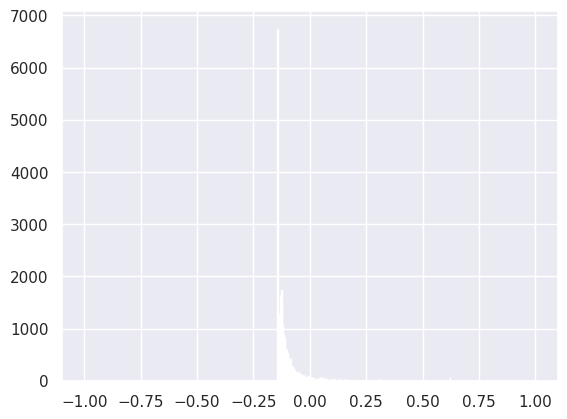

In [ ]:
from scipy.stats import zscore
df['SALE PRICE'] = df['SALE PRICE'].replace('[\$,]', '', regex=True).astype(float)
_ = plt.hist(zscore(df['SALE PRICE']), bins='auto', range=(-1, 1))
#power law distribution - right tail https://www.google.com/search?q=power+distribution+statistics

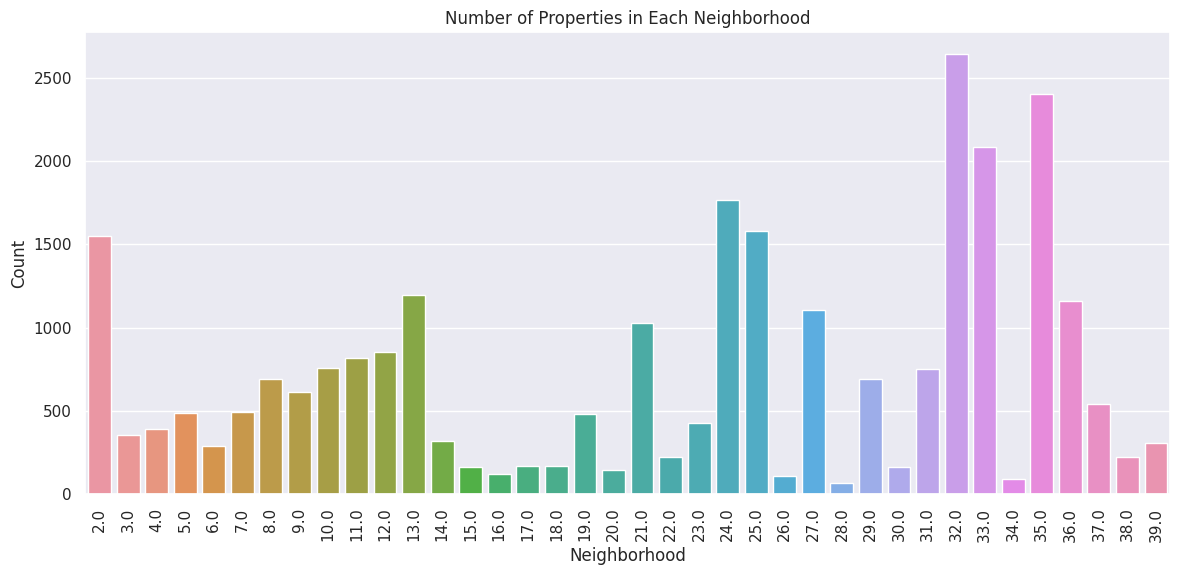

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(x='NEIGHBORHOOD', data=df)
plt.title('Number of Properties in Each Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

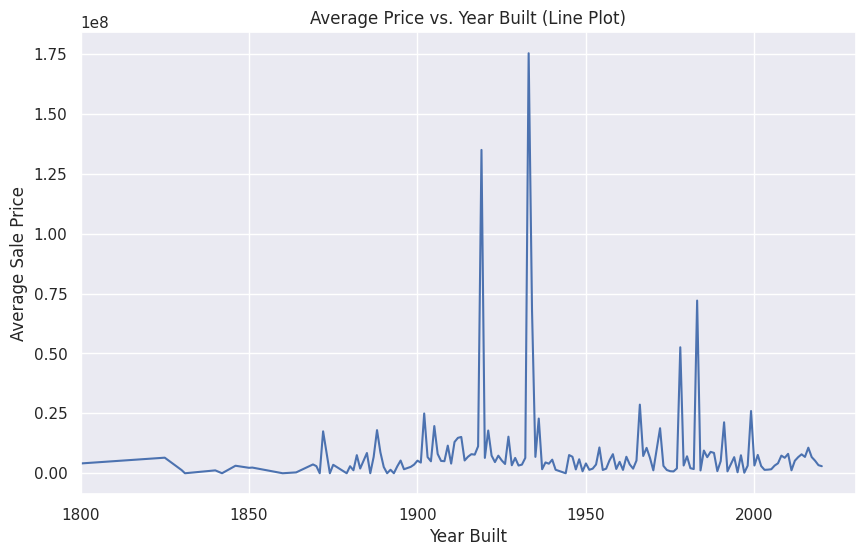

In [ ]:
df['SALE PRICE'] = df['SALE PRICE'].replace('[\$,]', '', regex=True).astype(float)

plt.figure(figsize=(10, 6))
average_prices = df.groupby('YEAR BUILT')['SALE PRICE'].mean()
average_prices.plot()
plt.title('Average Price vs. Year Built (Line Plot)')
plt.xlabel('Year Built')
plt.ylabel('Average Sale Price')

plt.xlim(1800,2030)
plt.show()


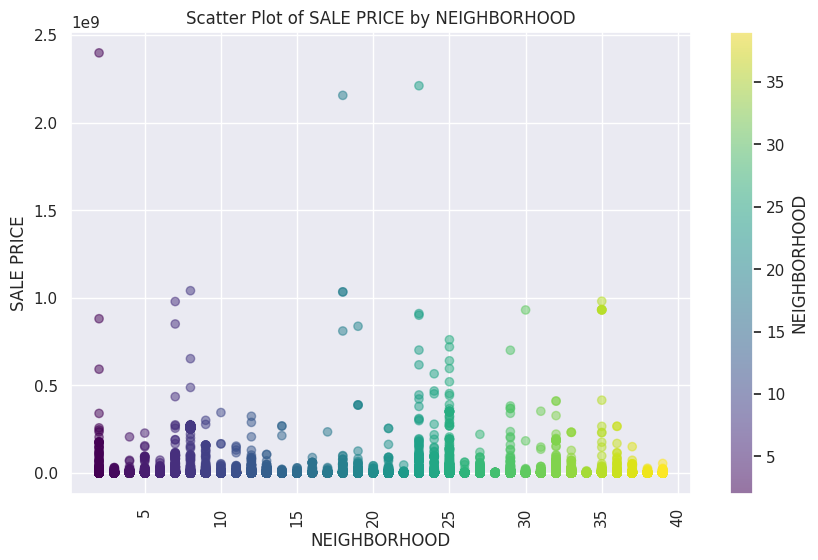

In [ ]:
df['SALE PRICE'] = df['SALE PRICE'].replace('[\$,]', '', regex=True).astype(float)


plt.figure(figsize=(10, 6))
plt.scatter(df['NEIGHBORHOOD'], df['SALE PRICE'], c=df['NEIGHBORHOOD'], cmap='viridis', alpha=0.5)
plt.title('Scatter Plot of SALE PRICE by NEIGHBORHOOD')
plt.xlabel('NEIGHBORHOOD')
plt.ylabel('SALE PRICE')
plt.xticks(rotation=90)
plt.colorbar(label='NEIGHBORHOOD')
plt.show()

do the same for scatter plot for the code above

In [ ]:
df.head()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ADDRESS,ZIP CODE,LAND \nSQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
1,2.0,01 ONE FAMILY DWELLINGS,374.0,46.0,347 EAST 4TH STREET,10009.0,"2,116",1900.0,399000.0,9/29/2022
2,2.0,02 TWO FAMILY DWELLINGS,377.0,1.0,110 AVENUE C,10009.0,"1,502",1901.0,2999999.0,9/15/2022
3,2.0,07 RENTALS - WALKUP APARTMENTS,373.0,16.0,326 EAST 4TH STREET,10009.0,"2,204",1899.0,16800000.0,8/4/2022
4,2.0,07 RENTALS - WALKUP APARTMENTS,373.0,17.0,328 EAST 4TH STREET,10009.0,"2,204",1900.0,16800000.0,8/4/2022
5,2.0,07 RENTALS - WALKUP APARTMENTS,376.0,54.0,"719 EAST SIXTH STREET, 1B",10009.0,"2,302",1900.0,158822.0,9/27/2022


In [ ]:
df = df[df['SALE PRICE'] != 0.0]

In [ ]:
df['LAND \nSQUARE FEET']

1            2,116
2            1,502
3            2,204
4            2,204
5            2,302
           ...    
27418         -   
27424       4,488 
27426      11,000 
27427       2,500 
27431       1,444 
Name: LAND \nSQUARE FEET, Length: 21197, dtype: object

In [ ]:
df.loc[:,'SALE DATE'] = pd.to_datetime(df.loc[:,'SALE DATE'])
df['SALE DATE'] = df['SALE DATE'].dt.strftime('%m/%d/%Y')


<ipython-input-29-be4cd5d6ceaa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'SALE DATE'] = pd.to_datetime(df.loc[:,'SALE DATE'])
<ipython-input-29-be4cd5d6ceaa>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'SALE DATE'] = pd.to_datetime(df.loc[:,'SALE DATE'])
<ipython-input-29-be4cd5d6ceaa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [ ]:
ir['DATE'] = pd.to_datetime(ir['DATE'])

ir['DATE'] = ir['DATE'].dt.strftime('%m/%d/%Y')

ir.to_csv('/content/DGS10.csv', index=False)
ir.head

<bound method NDFrame.head of             DATE DGS10
0     01/03/2017  2.45
1     01/04/2017  2.46
2     01/05/2017  2.37
3     01/06/2017  2.42
4     01/09/2017  2.38
...          ...   ...
1713  07/28/2023  3.96
1714  07/31/2023  3.97
1715  08/01/2023  4.05
1716  08/02/2023  4.08
1717  08/03/2023  4.20

[1718 rows x 2 columns]>

In [ ]:
#df['LAND \nSQUARE FEET'] = pd.to_numeric(df['LAND \nSQUARE FEET'].replace('[^\d.]', '', regex=True), errors='coerce')
#df['PRICE PER SQUARE FEET'] = df['SALE PRICE'] / df['LAND \nSQUARE FEET']
#df['PRICE PER SQUARE FEET']

In [ ]:
newdf = df.merge(ir, how = 'inner', left_on ='SALE DATE', right_on = 'DATE')
newdf.tail(1000)

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ADDRESS,ZIP CODE,LAND \nSQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,DATE,DGS10
20148,25.0,47 CONDO NON-BUSINESS STORAGE,1042.0,1379.0,"310 WEST 52ND STREET, SU64",10019.0,0,2005.0,16250.0,12/28/2018,12/28/2018,2.72
20149,25.0,47 CONDO NON-BUSINESS STORAGE,1042.0,1382.0,"310 WEST 52ND STREET, SU67",10019.0,0,2005.0,462218.0,12/28/2018,12/28/2018,2.72
20150,25.0,47 CONDO NON-BUSINESS STORAGE,1042.0,1384.0,"310 WEST 52ND STREET, SU69",10019.0,0,2005.0,462218.0,12/28/2018,12/28/2018,2.72
20151,25.0,47 CONDO NON-BUSINESS STORAGE,1042.0,1393.0,"310 WEST 52ND STREET, SU78",10019.0,0,2005.0,462218.0,12/28/2018,12/28/2018,2.72
20152,25.0,47 CONDO NON-BUSINESS STORAGE,1042.0,1395.0,"310 WEST 52ND STREET, SU80",10019.0,0,2005.0,462218.0,12/28/2018,12/28/2018,2.72
...,...,...,...,...,...,...,...,...,...,...,...,...
21143,35.0,47 CONDO NON-BUSINESS STORAGE,1171.0,3282.0,120 RIVERSIDE BOULEVARD,10069.0,-,0.0,20000.0,06/07/2017,06/07/2017,2.18
21144,36.0,26 OTHER HOTELS,1246.0,49.0,340 WEST 85TH STREET,10024.0,"7,663",1927.0,42000000.0,05/09/2017,05/09/2017,2.42
21145,36.0,35 INDOOR PUBLIC AND CULTURAL FACILITIES,1251.0,51.0,307 WEST 91ST STREET,10024.0,"1,850",1910.0,7777000.0,12/01/2017,12/01/2017,2.37
21146,37.0,46 CONDO STORE BUILDINGS,1883.0,1005.0,545 WEST 111 STREET,10025.0,-,1930.0,850000.0,05/31/2017,05/31/2017,2.21


In [ ]:
newdf.tail(10)

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ADDRESS,ZIP CODE,LAND \nSQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,DATE,DGS10
21138,35.0,47 CONDO NON-BUSINESS STORAGE,1171.0,1833.0,220 RIVERSIDE BOULEVARD,10069.0,-,0.0,28500.0,05/08/2017,05/08/2017,2.39
21139,35.0,47 CONDO NON-BUSINESS STORAGE,1171.0,1857.0,220 RIVERSIDE BOULEVARD,10069.0,-,0.0,18000.0,06/19/2017,06/19/2017,2.19
21140,35.0,47 CONDO NON-BUSINESS STORAGE,1171.0,1906.0,220 RIVERSIDE BOULEVARD,10069.0,-,0.0,20000.0,12/26/2017,12/26/2017,2.47
21141,35.0,47 CONDO NON-BUSINESS STORAGE,1171.0,2285.0,240 RIVERSIDE BOULEVARD,10069.0,-,2004.0,10000.0,06/09/2017,06/09/2017,2.21
21142,35.0,47 CONDO NON-BUSINESS STORAGE,1171.0,2442.0,240 RIVERSIDE BOULEVARD,10069.0,-,2004.0,10000.0,11/17/2017,11/17/2017,2.35
21143,35.0,47 CONDO NON-BUSINESS STORAGE,1171.0,3282.0,120 RIVERSIDE BOULEVARD,10069.0,-,0.0,20000.0,06/07/2017,06/07/2017,2.18
21144,36.0,26 OTHER HOTELS,1246.0,49.0,340 WEST 85TH STREET,10024.0,"7,663",1927.0,42000000.0,05/09/2017,05/09/2017,2.42
21145,36.0,35 INDOOR PUBLIC AND CULTURAL FACILITIES,1251.0,51.0,307 WEST 91ST STREET,10024.0,"1,850",1910.0,7777000.0,12/01/2017,12/01/2017,2.37
21146,37.0,46 CONDO STORE BUILDINGS,1883.0,1005.0,545 WEST 111 STREET,10025.0,-,1930.0,850000.0,05/31/2017,05/31/2017,2.21
21147,37.0,47 CONDO NON-BUSINESS STORAGE,1882.0,1133.0,545 WEST 110TH STREET,10025.0,-,2005.0,14000.0,07/05/2017,07/05/2017,2.33


In [ ]:
nan_columns2 = newdf.columns[newdf.isna().any()]
print("Columns with NaN values:", nan_columns2)

Columns with NaN values: Index(['LAND \nSQUARE FEET', 'YEAR BUILT'], dtype='object')


In [ ]:
df.shape

(21197, 10)

In [ ]:
newdf.shape

(21148, 12)

In [ ]:
df_cleaned = newdf.dropna(subset=['LAND \nSQUARE FEET'])

In [ ]:
df_cleaned = newdf.dropna(subset=['YEAR BUILT'])

In [ ]:
#Check for Nan values
has_nan = df_cleaned['DGS10'].isna().any().any()

if has_nan:
    print("The DataFrame contains NaN values.")
else:
    print("The DataFrame does not contain NaN values.")

The DataFrame does not contain NaN values.


In [ ]:
df_cleaned['LAND \nSQUARE FEET'] = pd.to_numeric(newdf['LAND \nSQUARE FEET'], errors='coerce')
df_cleaned['DGS10'] = pd.to_numeric(newdf['DGS10'], errors='coerce')
# Drop rows with NaN values in the 'LAND SQUARE FEET' column
newdf_1 = df_cleaned.dropna(subset=['LAND \nSQUARE FEET','DGS10'])

<ipython-input-40-543be7fcda3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['LAND \nSQUARE FEET'] = pd.to_numeric(newdf['LAND \nSQUARE FEET'], errors='coerce')
<ipython-input-40-543be7fcda3f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['DGS10'] = pd.to_numeric(newdf['DGS10'], errors='coerce')


In [ ]:

newdf_1 = newdf_1.dropna(subset=['DGS10'])

In [ ]:
is_all_float = (newdf_1['DGS10'].dtype == float)

if is_all_float:
    print("All elements in the column are of type float.")
else:
    print("Not all elements in the column are of type float.")

All elements in the column are of type float.


In [ ]:
unique_data_types = newdf_1['DGS10'].apply(type).unique()

print("Unique data types in the column:")
for data_type in unique_data_types:
    print(data_type)
unique_strings = newdf_1['DGS10'].astype(str).unique()

print("Unique string values in the column:")
for string_value in unique_strings:
    print(string_value)


Unique data types in the column:
<class 'float'>
Unique string values in the column:
2.75
1.98
2.79
2.03
2.84
2.88
2.82
2.99
2.78
2.98
3.8
3.33
3.67
2.68
2.32
1.96
1.86
2.93
3.88
3.26
1.72
1.78
2.86
3.83
3.31
1.82
1.85
2.05
2.48
3.75
2.0
3.45
4.07
1.54
1.12
0.93
0.81
1.7
0.61
0.74
0.83
0.69
0.71
0.84
1.61
0.76
1.66
1.13
0.96
1.33
0.86
0.7
1.55
0.88
0.62
0.63
0.72
0.64
0.94
0.75
1.83
0.79
0.55
1.65
0.65
0.68
1.79
0.95
0.67
0.78
0.92
1.6
0.9
0.89
1.1
1.02
1.59
0.87
0.91
0.98
0.66
1.87
0.82
0.77
0.73
0.59
1.84
2.39
2.61
1.77
2.73
2.65
1.89
2.12
2.6
1.67
2.13
2.72
2.71
2.55
2.06
2.5
2.07
2.69
2.09
1.63
1.5
1.8
1.9
1.49
1.74
1.76
1.69
1.73
1.92
1.88
1.52
2.74
2.01
2.63
1.75
1.81
1.47
2.54
2.04
2.25
2.41
2.59
2.76
2.37
2.42
1.93
2.67
2.49
1.62
2.51
2.26
2.64
2.4
2.52
2.08
2.7
1.56
2.47
3.14
2.87
3.17
2.89
3.24
2.83
3.07
3.19
2.44
3.1
2.96
2.97
3.11
2.92
3.06
2.91
3.21
2.85
3.0
3.05
2.95
2.77
2.81
2.57
2.94
3.08
3.01
2.66
2.9
3.22
3.12
2.46
3.03
3.15
3.2
2.3


In [ ]:
newdf_1['DGS10'] = pd.to_numeric(newdf_1['DGS10'], errors='coerce')

In [ ]:
nan_columns2 = newdf_1.columns[newdf_1.isna().any()]
print("Columns with NaN values:", nan_columns2)

Columns with NaN values: Index([], dtype='object')


In [ ]:
corr = newdf_1.corr()

<ipython-input-46-4468f0ec3d9f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = newdf_1.corr()


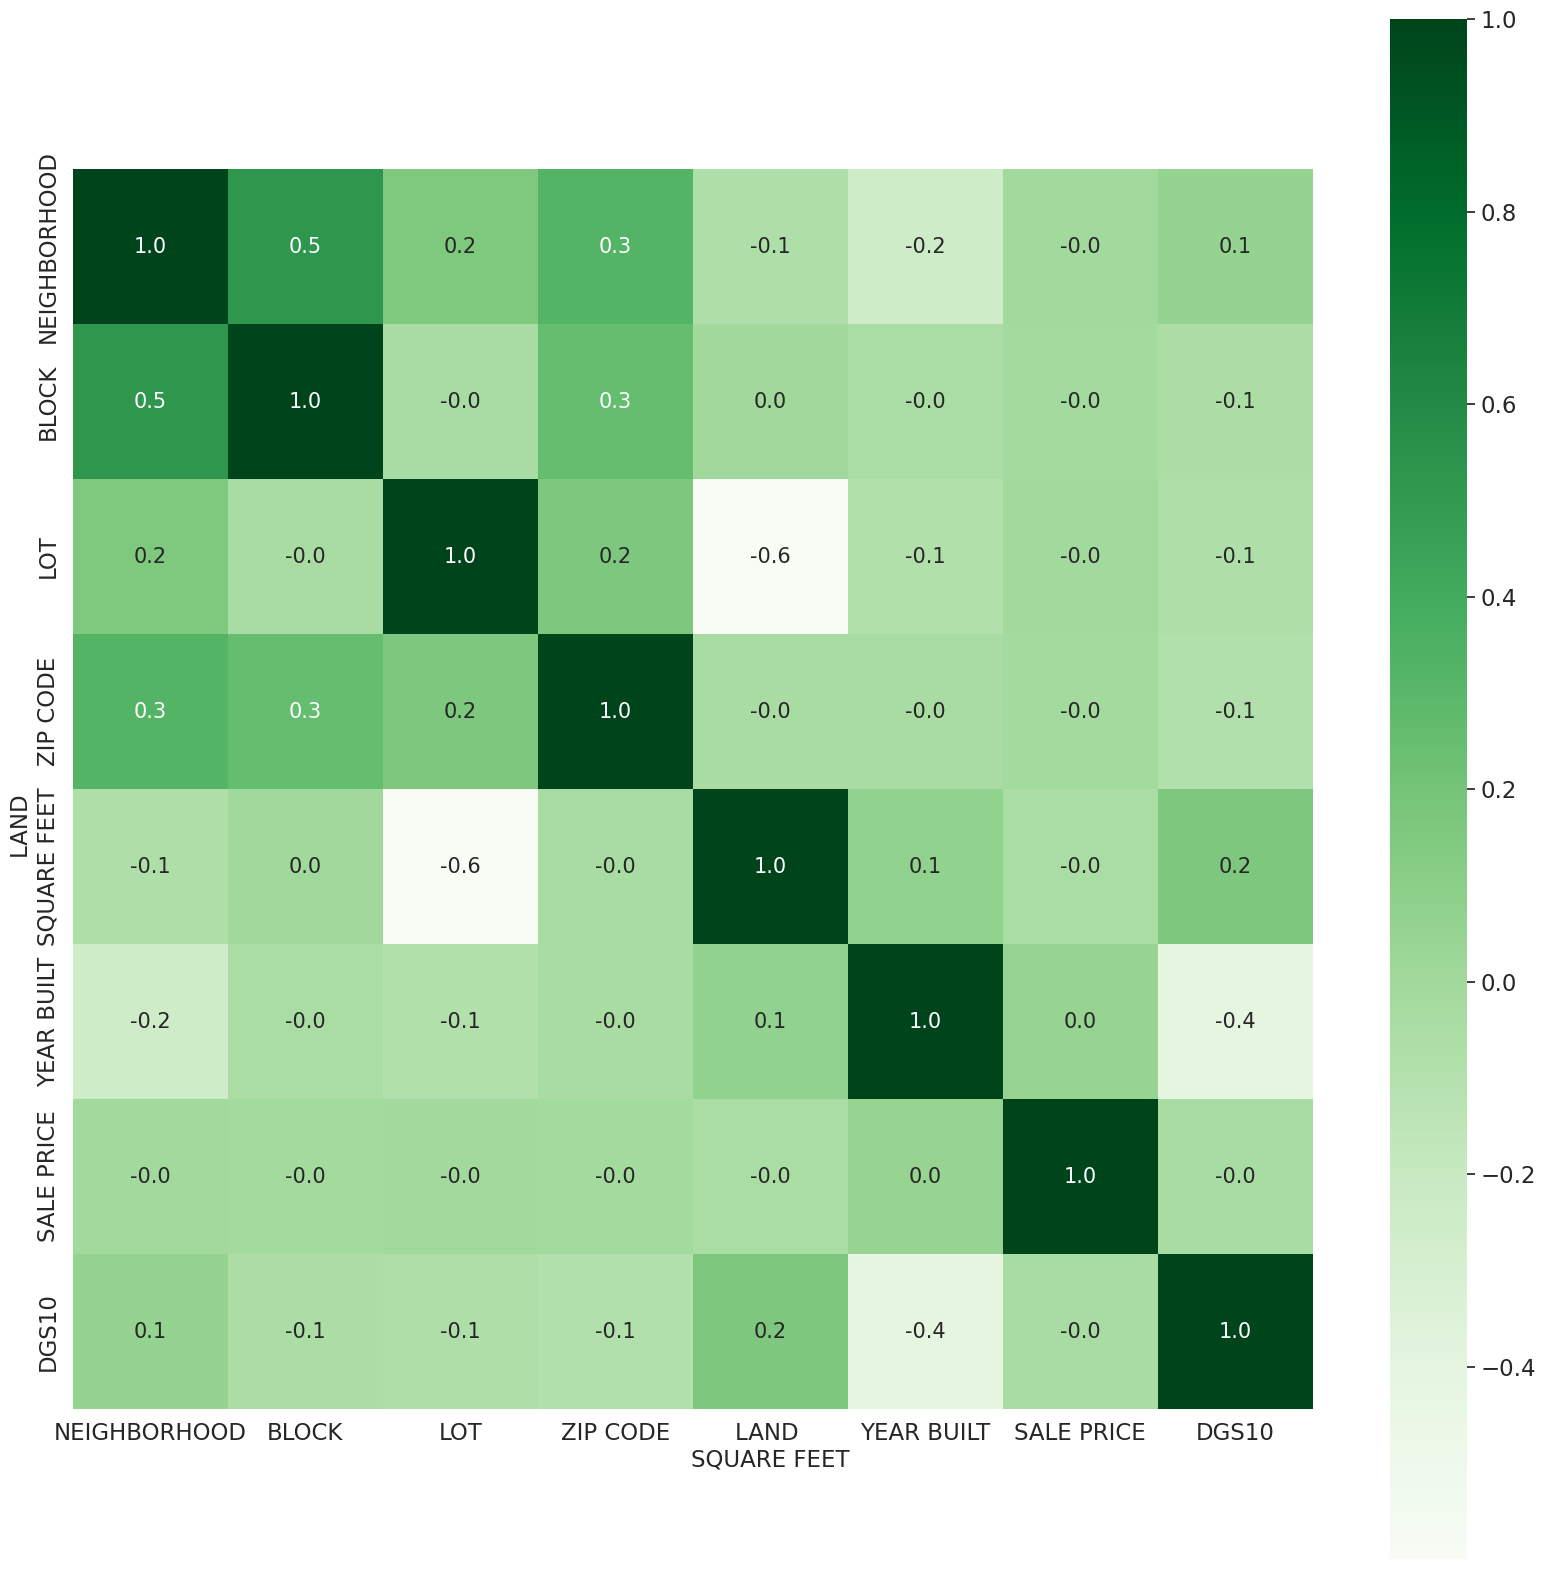

In [ ]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()

In [ ]:
newdf_1.describe()

,NEIGHBORHOOD,BLOCK,LOT,ZIP CODE,LAND \nSQUARE FEET,YEAR BUILT,SALE PRICE,DGS10
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,8.460000e+02,846.000000
mean,19.884161,940.672222,1242.494090,10024.131206,55.451537,1728.412530,2.089626e+07,2.058664
std,10.789467,488.816526,522.223039,29.930975,210.294917,645.331578,9.858378e+07,0.837908
min,2.000000,16.000000,1.000000,10001.000000,0.000000,0.000000,4.000000e+00,0.550000
25%,9.000000,560.500000,1019.000000,10013.000000,0.000000,1910.000000,5.050000e+05,1.492500
50%,23.000000,1042.000000,1203.000000,10018.000000,0.000000,1963.000000,2.170000e+06,2.090000
75%,27.000000,1290.000000,1441.750000,10023.000000,0.000000,2007.000000,8.518750e+06,2.790000
max,39.000000,2179.700000,4159.800000,10280.000000,998.000000,2018.000000,2.155000e+09,4.070000


In [ ]:
feature_list = list(newdf_1.select_dtypes(include=['float64']).columns)
feature_list.remove('SALE PRICE')

In [ ]:
y = newdf_1['SALE PRICE']

X = newdf_1[feature_list]
print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features:" + str(X.shape[1]))
print(str(list(X.columns)))

Number of examples: 846

Number of Features:7
['NEIGHBORHOOD', 'BLOCK', 'LOT', 'ZIP CODE', 'LAND \nSQUARE FEET', 'YEAR BUILT', 'DGS10']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape)
print(X_test.shape)

(676, 7)
(170, 7)


- save the file after preparation
- work on visualization
- add interest rates
- pickle library extentsion

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_predrf = rf_model.predict(X_test)

# Evaluate the model
mserf = mean_squared_error(y_test, y_predrf)
r2rf = r2_score(y_test, y_predrf)

print(f'Mean Squared Error: {mserf:.2f}')
print(f'R-squared: {r2rf:.2f}')


Mean Squared Error: 1115776723387660.75
R-squared: 0.43


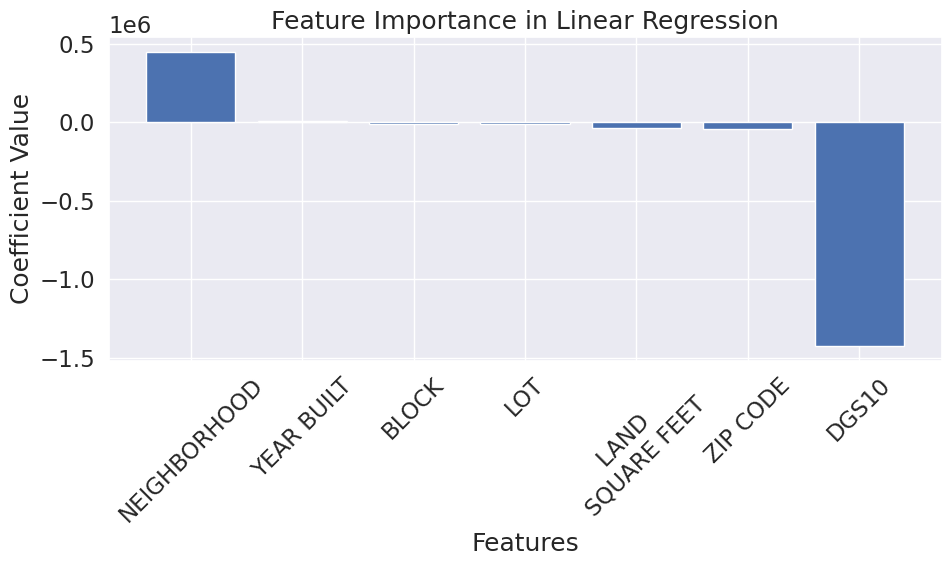

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()


reg.fit(X_train, y_train)

prediction = reg.predict(X_test)

feature_importance = reg.coef_


sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = X_train.columns[sorted_indices]
sorted_importance = feature_importance[sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importance)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
print('Model Summary:\n')

# Print intercept (alpha)
print('Intercept:')
print('alpha = ' , reg.intercept_)

# Print weights
print('\nWeights:')
i = 0
for w in reg.coef_:
    print('w_',i+1,'= ', w, ' [ weight of ', feature_list[i],']')
    i += 1

print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, prediction)))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_test, prediction))

Model Summary:

Intercept:
alpha =  456235557.27467793

Weights:
w_ 1 =  446932.02418525366  [ weight of  NEIGHBORHOOD ]
w_ 2 =  -8733.296013496143  [ weight of  BLOCK ]
w_ 3 =  -9732.015893342576  [ weight of  LOT ]
w_ 4 =  -43055.05680147813  [ weight of  ZIP CODE ]
w_ 5 =  -36043.322625229404  [ weight of  LAND 
SQUARE FEET ]
w_ 6 =  8194.93473520685  [ weight of  YEAR BUILT ]
w_ 7 =  -1422451.792618782  [ weight of  DGS10 ]

Model Performance

RMSE =   44974976.14
 R^2 =   -0.04


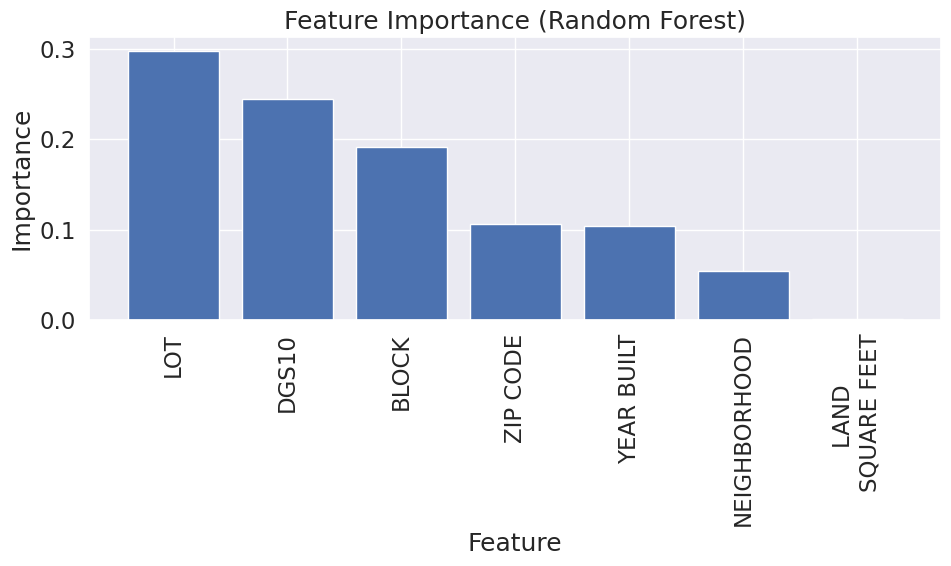

In [ ]:
importances = rf_model.feature_importances_

# Get feature names
feature_names = X.columns

# Sort indices based on importance
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
rf20_model = RandomForestRegressor(n_estimators=20, random_state=42)

# Fit the model on the training data
rf20_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred20 = rf20_model.predict(X_test)

# Evaluate the model
mserf20 = mean_squared_error(y_test, y_pred20)
r2rf20 = r2_score(y_test, y_pred20)

print(f'Mean Squared Error: {mserf20:.2f}')
print(f'R-squared: {r2rf20:.2f}')

Mean Squared Error: 1304235595353860.00
R-squared: 0.33


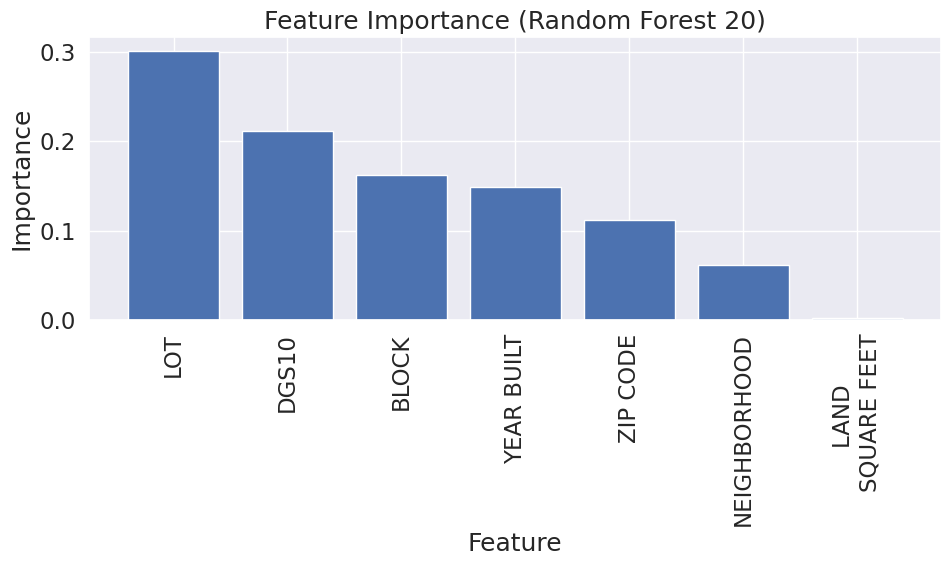

In [ ]:
importances = rf20_model.feature_importances_

# Get feature names
feature_names = X.columns

# Sort indices based on importance
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest 20)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

Mean Squared Error: 1186586957890756.50
R-squared: 0.39


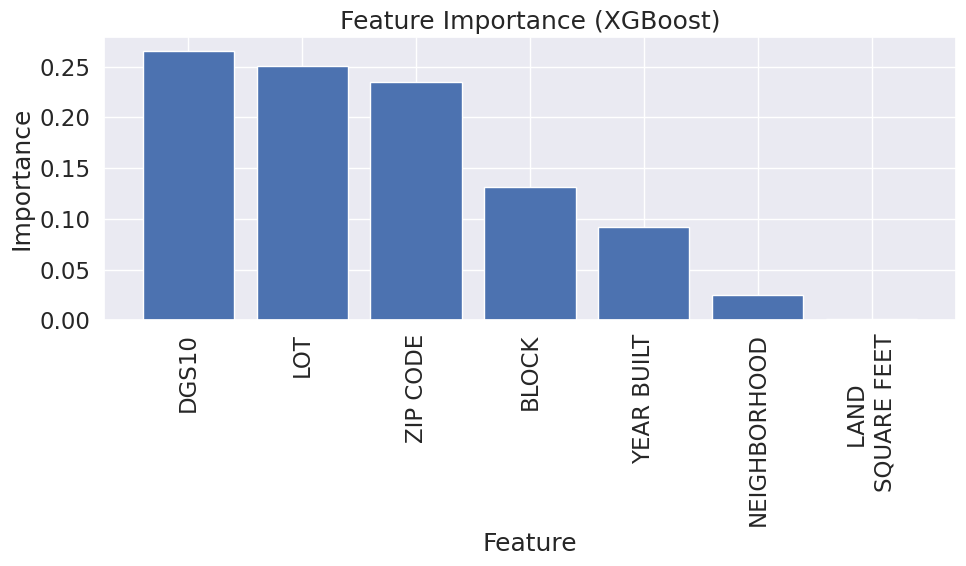

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)


xgb_model.fit(X_train, y_train)


y2_pred = xgb_model.predict(X_test)


mse = mean_squared_error(y_test, y2_pred)
print(f"Mean Squared Error: {mse:.2f}")

r2 = r2_score(y_test, y2_pred)
print(f"R-squared: {r2:.2f}")
importances = xgb_model.feature_importances_

feature_names = X.columns

indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance (XGBoost)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
def train_test_LR(X_train, y_train, X_test, y_test, c=1):
    model = LogisticRegression(C=c)
    model.fit(X_train, y_train)
    probability_predictions = model.predict_proba(X_test)
    l_loss = log_loss(y_test, probability_predictions)
    class_label_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)
    precision = precision_score(y_test, class_label_predictions)
    recall = recall_score(y_test, class_label_predictions)
    f1 = f1_score(y_test, class_label_predictions)
    r2 = r2_score(y_test, class_label_predictions)
    rmse = mean_squared_error(y_test, class_label_predictions, squared=False)
    conf_matrix = confusion_matrix(y_test, class_label_predictions)
    return l_loss, acc_score, precision, recall, f1, r2, rmse, conf_matrix

In [ ]:
l_loss, acc_score, precision, recall, f1, r2, rmse, conf_matrix = train_test_LR(X_train, y_train, X_test, y_test)

print(f'Log Loss: {l_loss:.4f}')
print(f'Accuracy Score: {acc_score:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'R2 Score: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')
print("Confusion Matrix:")
print(conf_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: ignored

In [ ]:



print('Done')
y_dt_pred = dt_model.predict(X_test)

dt_rmse = mean_squared_error(y_test, y_dt_pred, squared=False)

dt_r2 = r2_score(y_test, y_dt_pred)

print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))


Data preparation, also known as data preprocessing, is a crucial step in the data analysis and machine learning workflow. It involves transforming raw data into a clean, structured, and suitable format for analysis or model training. Data preparation aims to handle various data-related issues, such as missing values, outliers, scaling, normalization, encoding categorical variables, and more. Below are some common tasks performed during the data prepping process:

Data Cleaning:
Handling Missing Values: Identify and handle missing data points, either by imputation or removal of rows/columns.
Handling Outliers: Identify and handle outliers that could adversely affect the analysis or modeling.
Data Transformation:
Feature Scaling: Normalize or standardize numerical features to bring them to a similar scale.
Feature Encoding: Convert categorical variables into numerical representations (e.g., one-hot encoding, label encoding) to be used in machine learning models.
Feature Engineering: Create new features or transform existing features to provide more relevant information for the task at hand.
Data Reduction:
Dimensionality Reduction: Reduce the number of features in the dataset using techniques like Principal Component Analysis (PCA) or feature selection methods.
Data Splitting:
Split the dataset into training, validation, and test sets to evaluate the model's performance accurately.
Data Normalization:
Normalize the data if required to ensure that different features are on similar scales.
Data Augmentation (for image/audio data):
Generate additional training data by applying random transformations (e.g., rotation, flipping) to increase the model's generalization capability.
Data Balancing (for imbalanced datasets):
Address class imbalances in the dataset, especially in classification tasks, to prevent models from being biased towards the majority class.
Handling Text Data (for NLP tasks):
Tokenization: Convert text into tokens or words for further processing.
Stopwords Removal: Eliminate common words (e.g., "and," "the") that may not carry significant meaning.
Lemmatization/ stemming: Reduce words to their base or root form to reduce dimensionality.
Handling Time Series Data:
Resampling: Adjust the frequency of time series data (e.g., converting hourly data to daily data).
Lag Features: Create lag features to capture historical patterns in time series data.
Handling Duplicate Data:
Identify and remove any duplicate records in the dataset.
